In [1]:
import numpy as np #강의 38분 20초
from scipy.stats import norm
def BS_put(S,K,r,q,T,sigma):
    d1=(np.log(S/K)+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)
def digital_option(S1,S2,T):
    if T==0.5:
        payoff=np.array((S1>0.85) & (S2>0.85))     
    if T==1:
        payoff=np.array((S1>0.80) & (S2>0.80))
    if T==1.5:
        payoff=np.array((S1>0.75) & (S2>0.75))
    if T==2:
        payoff=np.array((S1>0.70) & (S2>0.70))
    return payoff/pow(1+r,T)*100
def control_variable(r,q1,q2,sigma1,sigma2,rho,M,n):
    ##################################################ELS valuation
    value_list=np.zeros(M)
    case_list=np.zeros(M)
    
    X1=np.zeros((n*4+1,M))
    X1[0]=np.ones(M)
    X2=np.zeros((n*4+1,M))
    X2[0]=np.ones(M)
    for i in range(X1.shape[0]-1):
        T=1/(n*2)
        x1=np.random.normal(size=M)
        x2=np.random.normal(size=M)
        e1=x1
        e2=rho*x1+x2*np.sqrt(1-pow(rho,2))
        X1[i+1]=X1[i]/np.exp((q1-r-pow(sigma1,2)/2)*T+sigma1*e1*np.sqrt(T))
        X2[i+1]=X2[i]/np.exp((q2-r-pow(sigma2,2)/2)*T+sigma2*e2*np.sqrt(T))
    profit_flag=np.ones(M)
    for i in range(M):
        if (True in list(X1[:,i]<0.6)) or (True in list(X2[:,i]<0.6)):
            profit_flag[i]=0

    case=0
    ########60퍼 이하로 안떨어진 경우
    for i in range(M):
        if profit_flag[i]==1:
            if X1[:,i][n*1]>=0.85 and X2[:,i][n*1]>=0.85:
                value=100*pow(1+0.125,0.5)/pow(1+r,0.5)
                case=1
            elif X1[:,i][n*2]>=0.80 and X2[:,i][n*2]>=0.80:
                value=100*pow(1+0.125,1)/pow(1+r,1)
                case=2
            elif X1[:,i][n*3]>=0.75 and X2[:,i][n*3]>=0.75:
                value=100*pow(1+0.125,1.5)/pow(1+r,1.5)
                case=3
            elif X1[:,i][n*4]>=0.70 and X2[:,i][n*4]>=0.70:
                value=100*pow(1+0.125,2)/pow(1+r,2)
                case=4
            elif X1[:,i][n*4]<=0.70 or X2[:,i][n*4]<=0.70:
                value=100/pow(1+r,2)
                case=5
        ########60퍼 이하로 떨어진 경우              
        if profit_flag[i]==0: 
            if X1[:,i][n*4]<0.70 or X2[:,i][n*4]<0.70:
                value=min(X1[:,i][n*4]*100,X2[:,i][n*4]*100)/pow(1+r,2)
                case=6
            elif X1[:,i][n*4]>=0.70 and X2[:,i][n*4]>=0.70:
                value=100*pow(1+0.125,2)/pow(1+r,2)
                case=4
        value_list[i]=value
        case_list[i]=case
    Y=value_list
    ########################################################## T1 시점 s1
    X=np.ones((M,20))
    ##########  S1 데이터
    X[:,0]=(X1[n*1].T)*100/pow(1+r,0.5)
    X[:,1]=(X1[n*2].T)*100/pow(1+r,1)
    X[:,2]=(X1[n*3].T)*100/pow(1+r,1.5)
    X[:,3]=(X1[n*4].T)*100/pow(1+r,2)
    ##########  S2 데이터
    X[:,4]=(X2[n*1].T)*100/pow(1+r,0.5)
    X[:,5]=(X2[n*2].T)*100/pow(1+r,1)
    X[:,6]=(X2[n*3].T)*100/pow(1+r,1.5)
    X[:,7]=(X2[n*4].T)*100/pow(1+r,2)
    ##########  S1 put
    X[:,8]=BS_put(X1[n*1],0.85,r,q1,1/2*0,sigma1)*100/pow(1+r,0.5)
    X[:,9]=BS_put(X1[n*2],0.8,r,q1,1/2*0,sigma1)*100/pow(1+r,1)
    X[:,10]=BS_put(X1[n*3],0.75,r,q1,1/2*0,sigma1)*100/pow(1+r,1.5)
    X[:,11]=BS_put(X1[n*4],0.7,r,q1,1/2*0,sigma1)*100/pow(1+r,2)
    ##########  S2 put
    X[:,12]=BS_put(X2[n*1],0.85,r,q2,1/2*0,sigma2)*100/pow(1+r,0.5)
    X[:,13]=BS_put(X2[n*2],0.8,r,q2,1/2*0,sigma2)*100/pow(1+r,1)
    X[:,14]=BS_put(X2[n*3],0.75,r,q2,1/2*0,sigma2)*100/pow(1+r,1.5)
    X[:,15]=BS_put(X2[n*4],0.7,r,q2,1/2*0,sigma2)*100/pow(1+r,2)
    ##########  digital
    X[:,16]=digital_option(X1[n*1],X2[n*1],0.5)
    X[:,17]=digital_option(X1[n*1],X2[n*1],1)
    X[:,18]=digital_option(X1[n*1],X2[n*1],1.5)
    X[:,19]=digital_option(X1[n*1],X2[n*1],2)
    
    return Y,X,case_list
r=0.03
q1=0.0
q2=0.0
sigma1=0.3
sigma2=0.4
rho=0.2
M=100000
n=8
####  Y=discounted payoff
####  X=x candidate 
##### s1 , s1 의 시점마다 주가 discounted
Y,X,trash=control_variable(r,q1,q2,sigma1,sigma2,rho,M,n)

corr=np.zeros(20)
for i in range(20):
    a=np.column_stack((Y,X[:,i]))
    corr[i]=np.corrcoef(a,rowvar=False)[0,1]
print('        t=0.5   t=1.0   t=1.5   t=2.0')
print('S1     ',end='')
for i in range(4):
    print('{:{width}.4f}'.format(corr[i],width=7),end=' ')
print(' ')
print('S2     ',end='')
for i in range(4,8):
    print('{:{width}.4f}'.format(corr[i],width=7),end=' ')
print(' ')
print('put1   ',end='')
for i in range(8,12):
    print('{:{width}.4f}'.format(corr[i],width=7),end=' ')
print(' ')
print('put2   ',end='')
for i in range(12,16):
    print('{:{width}.4f}'.format(corr[i],width=7),end=' ')
print(' ')
print('digital',end='')
for i in range(16,20):
    print('{:{width}.4f}'.format(corr[i],width=7),end=' ')
print(' ')


c:\users\lee\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


        t=0.5   t=1.0   t=1.5   t=2.0
S1      0.2640  0.2834  0.2848  0.2748  
S2      0.3619  0.3810  0.3730  0.3554  
put1   -0.3183 -0.3943 -0.4245 -0.4169  
put2   -0.4549 -0.5711 -0.6132 -0.6121  
digital 0.4768  0.4981  0.5353  0.5760  


In [ ]:
'''t=0.5   t=1.0   t=1.5   t=2.0
S1      0.2670  0.2895  0.2889  0.2795  
S2      0.3553  0.3783  0.3692  0.3514  
put1   -0.3224 -0.4012 -0.4313 -0.4287  
put2   -0.4499 -0.5669 -0.6050 -0.6078  
digital 0.4716  0.4953  0.5296  0.5745 '''

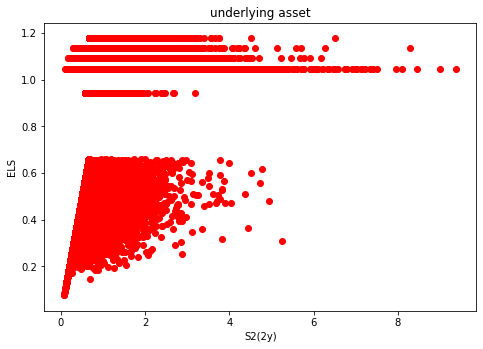

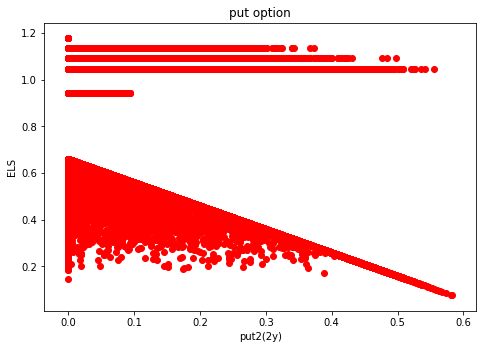

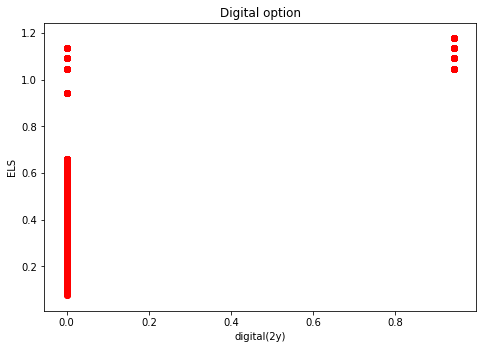

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,7], Y, color='r')
ax.set_xlabel('S2(2y)')
ax.set_ylabel('ELS')
ax.set_title('underlying asset')
plt.show()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,15], Y, color='r')
ax.set_xlabel('put2(2y)')
ax.set_ylabel('ELS')
ax.set_title('put option')
plt.show()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,19], Y, color='r')
ax.set_xlabel('digital(2y)')
ax.set_ylabel('ELS')
ax.set_title('Digital option')
plt.show()

In [3]:
import numpy as np #51분 56초에 아무거나 해도 된다고함
from scipy.stats import norm

def ELS_control(r,q1,q2,sigma1,sigma2,rho,M,m):
    Y,X,case_list=control_variable(r,q1,q2,sigma1,sigma2,rho,M,n)
    
    value=Y.mean()
    err=np.std(Y)/np.sqrt(M)
    unique, counts = np.unique(case_list, return_counts=True)
    counts=counts/M
    prob=dict(zip(unique, counts))
    
    
    b=np.cov(Y,X[:,15])[0][1]/X[:,15].var()
    EX = BS_put(S=1,K=0.7,r=r,q=q2,T=2,sigma=sigma2)*100
    mx=X[:,15].mean()
    Y_hat=Y-b*(X[:,15]-EX)
    
    value2=Y_hat.mean()
    err2=np.std(Y_hat)/np.sqrt(M)

        
    return value,value2,err,err2,prob,b,mx,EX
from datetime import datetime
r=0.03
q1=0.0
q2=0.0
sigma1=0.3
sigma2=0.4
rho=0.2
M=10000
m=3
t1=datetime.now()
value,value2,err,err2,prob,b,mx,EX=ELS_control(r,q1,q2,sigma1,sigma2,rho,M,m)
t2=datetime.now()
print('value = {:.2f}, value2 = {:.2f}, err = {:.2f}, err2 = {:.2f}'.format(value,value2,err,err2))
for i in range(6):
    try:
        print('prob[{:d}] = {:{width}.2%}'.format(i+1,prob[i+1],width=6))
    except KeyError:
        print('prob[{:d}] = {:{width}.2%}'.format(i+1,0,width=6))
print('Total sum of prob = {:.0%}'.format(sum(prob.values())))
print('Total computing time = {:f} seconds'.format((t2-t1).total_seconds()))

value = 93.22, value2 = 93.12, err = 0.27, err2 = 0.21
prob[1] = 54.66%
prob[2] = 12.58%
prob[3] =  6.81%
prob[4] =  4.10%
prob[5] =  0.19%
prob[6] = 21.66%
Total sum of prob = 100%
Total computing time = 0.066821 seconds


c:\users\lee\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
'''value = 92.97, value2 = 93.20, err = 0.27, err2 = 0.21
prob[1] = 54.23%
prob[2] = 12.56%
prob[3] =  6.67%
prob[4] =  4.25%
prob[5] =  0.41%
prob[6] =  1.27%
prob[7] = 20.61%
Total sum of prob = 100%
Total computing time = 0.616036 seconds'''

In [4]:
b,mx,EX

(-1.4795580037363885, 5.954397116908512, 6.025617603963604)